In [ ]:
# Datasource - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Dataset - https://drive.google.com/file/d/1XDKF0QAGRb_GAvuQEPLBQawOiWcRuiDK/view?usp=drive_link

In [92]:
# Import required librareis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/sms_spam.csv')
data.shape

(5574, 2)

In [3]:
# data sample
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# statistical description
data.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [11]:
# view the data description from target pov
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [13]:
# length of the text message
data['text_length'] = data['text'].apply(len)
data.head()

,type,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


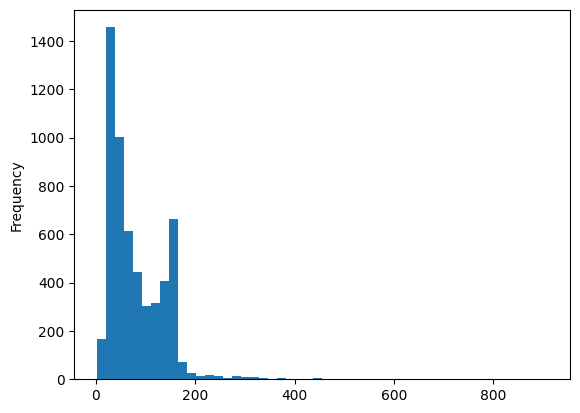

In [18]:
# distibution of text length
data['text_length'].plot(bins=50, kind='hist')
plt.show()

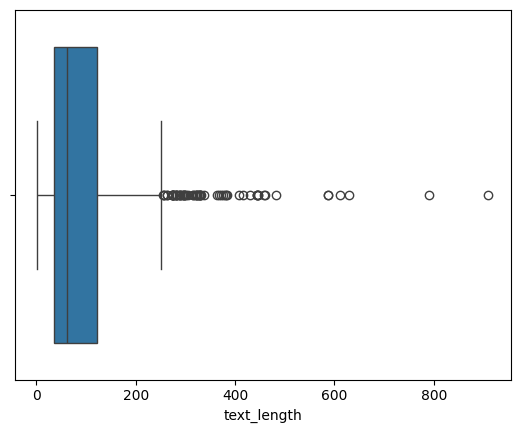

In [19]:
# boxplot
sns.boxplot(data['text_length'], orient='h')
plt.show()

In [20]:
# stats description of the length columns
data['text_length'].describe()

,text_length
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [37]:
# print the shortest and longest message
print('Shortest Message:', data[data['text_length'] == data['text_length'].min()]['text'].iloc[0])
print('Longest Message:', data[data['text_length'] == data['text_length'].max()]['text'].iloc[0])

Shortest Message: Ok
Longest Message: For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


# Text Preprocessing

In [43]:
import string
message = 'This i%s a #sample message& to remo@ve punctuations!.'
clean_text = [char for char in message if char not in string.punctuation]
clean_text = ''.join(clean_text)
print(clean_text)

This is a sample message to remove punctuations


In [48]:
# NLTK library
import nltk     # Natural Language Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
# function to remove punctuations and stopwords
def text_processing(message):
    import string
    clean_text = ''.join([char for char in message if char not in string.punctuation])
    return [word for word in clean_text.split() if word.lower() not in stopwords.words('english')]

In [61]:
# Sample of the above function on the data
data['text'].head().apply(text_processing)

,text
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."


In [64]:
# data sample
data.head()

,type,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [85]:
# Encoding the labels
data['type'] = data['type'].map({'ham': 0, 'spam': 1})
data.head()

,type,text,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['type'], test_size=0.2, random_state=42)

In [99]:
# Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [100]:
# Naive bayes model
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
print('Training Accuracy:', round(model.score(x_train_tfidf, y_train)*100,2), '%')

Training Accuracy: 98.23 %


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



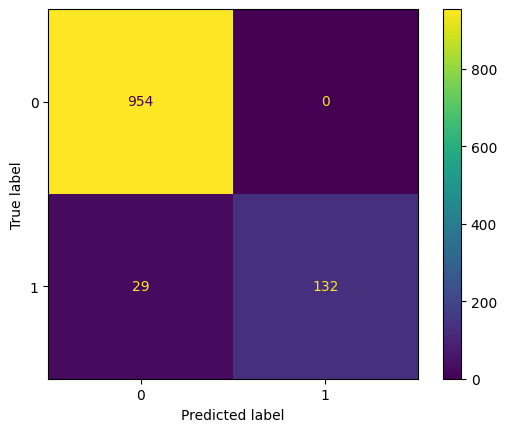

In [101]:
# Model testing
y_pred = model.predict(x_test_tfidf)

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

In [135]:
# Predicting the real time input

def predict_message():
    '''Enter a message as string to predict if the message is ham or spam.'''
    message = str(input('Enter a string to predict: '))
    input_tfidf = vectorizer.transform([message])
    prediction = model.predict(input_tfidf)
    return 'The Message is Spam' if prediction[0] == 1 else 'The Message is Ham'

In [145]:
predict_message()

Enter a string to predict: Please call our customer service representative


'The Message is Spam'

In [143]:
data['type'].value_counts(normalize=True)*100

,proportion
type,
0,86.598493
1,13.401507
